# Workshop 3:  netCDF, xarray, pandas

# Part III:  Advanced xarray

We can apply many of the same operations on xarray DataArrays as with pandas Series/DataFrames and numpy ndarrays.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset('data/gistemp1200_GHCNv4_ERSSTv5.nc')

### Broadcasting

Broadcasting arrays in numpy is a nightmare. It is much easier when the data axes are labeled!

This is a useless calculation, but it illustrates how perfoming an operation on arrays with differenty coordinates will result in automatic broadcasting

In [3]:
lon_times_lat = ds.lon * ds.lat
lon_times_lat

<xarray.DataArray (lon: 180, lat: 90)>
array([[ 15931.,  15573.,  15215., ..., -15215., -15573., -15931.],
       [ 15753.,  15399.,  15045., ..., -15045., -15399., -15753.],
       [ 15575.,  15225.,  14875., ..., -14875., -15225., -15575.],
       ...,
       [-15575., -15225., -14875., ...,  14875.,  15225.,  15575.],
       [-15753., -15399., -15045., ...,  15045.,  15399.,  15753.],
       [-15931., -15573., -15215., ...,  15215.,  15573.,  15931.]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0

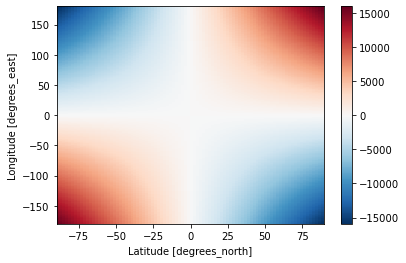

In [4]:
lon_times_lat.plot()

### Reductions

Just like in numpy, we can reduce xarray DataArrays along any number of axes:

In [5]:
ds.tempanomaly.mean(axis=0).dims

/Users/Andre/miniconda3/envs/teach/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


('lat', 'lon')

In [6]:
ds.tempanomaly.mean(axis=1).dims

('time', 'lon')

However, rather than performing reductions on axes (as in numpy), we can perform them on dimensions. This turns out to be a huge convenience

In [7]:
ds_zonal_mean = ds.mean(dim='lon')
ds_zonal_mean

<xarray.Dataset>
Dimensions:      (lat: 90, time: 1688)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2020-08-15
Data variables:
    tempanomaly  (time, lat) float32 nan nan nan ... 1.4600002 1.4600002

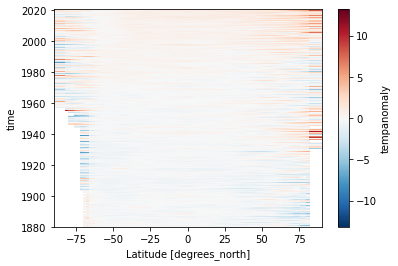

In [8]:
ds_zonal_mean.tempanomaly.plot()

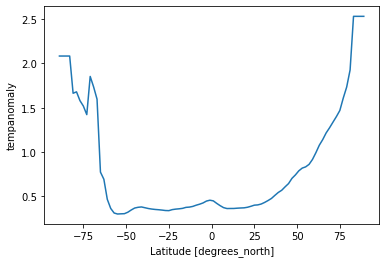

In [9]:
ds_zonal_mean.tempanomaly.std('time').plot()

### Rolling
Similar to the `resample` method we used in the previous exercise, we can calculate the running mean to smooth signals.

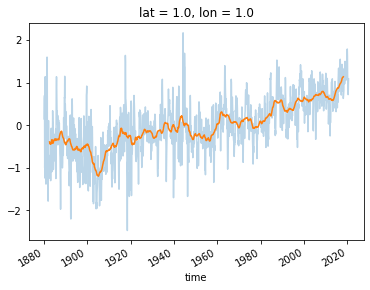

In [10]:
example = ds.sel({'lat':0, 'lon':0}, method='nearest').tempanomaly
ds_rolling = example.rolling(time=5*12, center=True).mean()
example.plot(alpha=.3)
ds_rolling.plot()  # notice the missing values at either end

### access the time

You can access time properties with the `dt` accessor.

In [11]:
ds.time.dt.year

<xarray.DataArray 'year' (time: 1688)>
array([1880, 1880, 1880, ..., 2020, 2020, 2020])
Coordinates:
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2020-08-15

## <span style="color:blue">Exercises</span>

1. Calculate the standard deviation of the monthly and annual temperatures and create two maps thereof in a single figure.

2. Calculate the linear trend of a temperature time series above in [$^\circ$C/century].

## <span style="color:green">Solutions</span>

/Users/Andre/miniconda3/envs/teach/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Andre/miniconda3/envs/teach/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


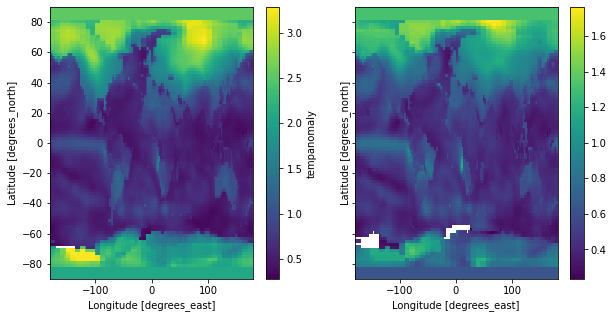

In [12]:
# 1. Calculate the standard deviation of the monthly and annual temperatures 
# and create two maps thereof in a single figure.
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ds.tempanomaly.std('time').plot(ax=ax[0])
ds.tempanomaly.rolling(time=12, center=True).mean().std('time').plot(ax=ax[1])

In [13]:
# 2. Calculate the linear trend of a temperature time series above in [$^\circ$C/century].
pf = np.polyfit(example.time.dt.year+example.time.dt.month/12, example, deg=1)
print(f'The temperature increase is {pf[0]*100:.1f} K/century')

The temperature increase is 1.0 K/century
